# Polynomial Regression

## Importing the dataset

In [1]:
dataset = read.csv('./Datasets/Position_Salaries.csv')
dataset = dataset[2:3]

In [2]:
dataset

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000
10,1000000


## Fitting Linear Regression to the dataset

In [3]:
lin_reg = lm(formula = Salary ~ .,
             data = dataset)

In [4]:
summary(lin_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


## Fitting Polynomial Regression to the dataset

In [5]:
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
dataset$Level5 = dataset$Level^5
dataset$Level6 = dataset$Level^6
poly_reg = lm(formula = Salary ~ .,
              data = dataset)

In [6]:
summary(poly_reg)


Call:
lm(formula = Salary ~ ., data = dataset)

Residuals:
      1       2       3       4       5       6       7       8       9      10 
 -190.6   913.2 -1383.4   122.4  1191.1   717.9 -3940.6  4110.7 -1867.7   326.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  82166.667  46776.837   1.757   0.1772  
Level       -82943.998  87810.183  -0.945   0.4146  
Level2       65896.402  57802.944   1.140   0.3371  
Level3      -24381.957  17847.332  -1.366   0.2653  
Level4        4929.087   2806.401   1.756   0.1773  
Level5        -495.433    217.397  -2.279   0.1070  
Level6          19.792      6.576   3.010   0.0572 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3686 on 3 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9998 
F-statistic:  9896 on 6 and 3 DF,  p-value: 1.571e-06


## Visualising the Linear Regression results

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


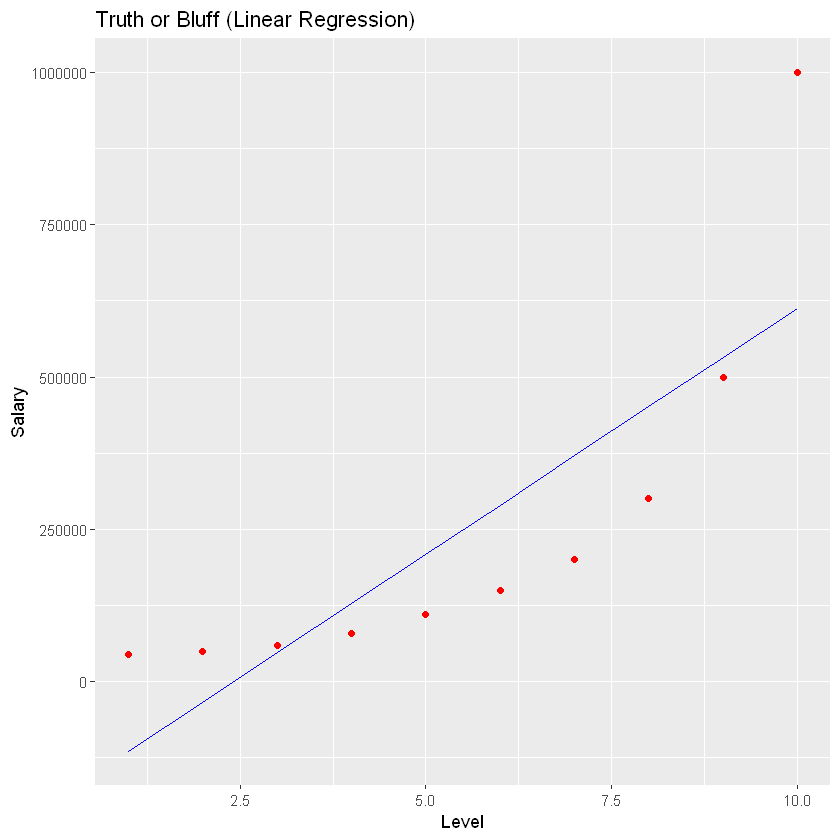

In [7]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Linear Regression)') +
  xlab('Level') +
  ylab('Salary')

## Visualising the Polynomial Regression results

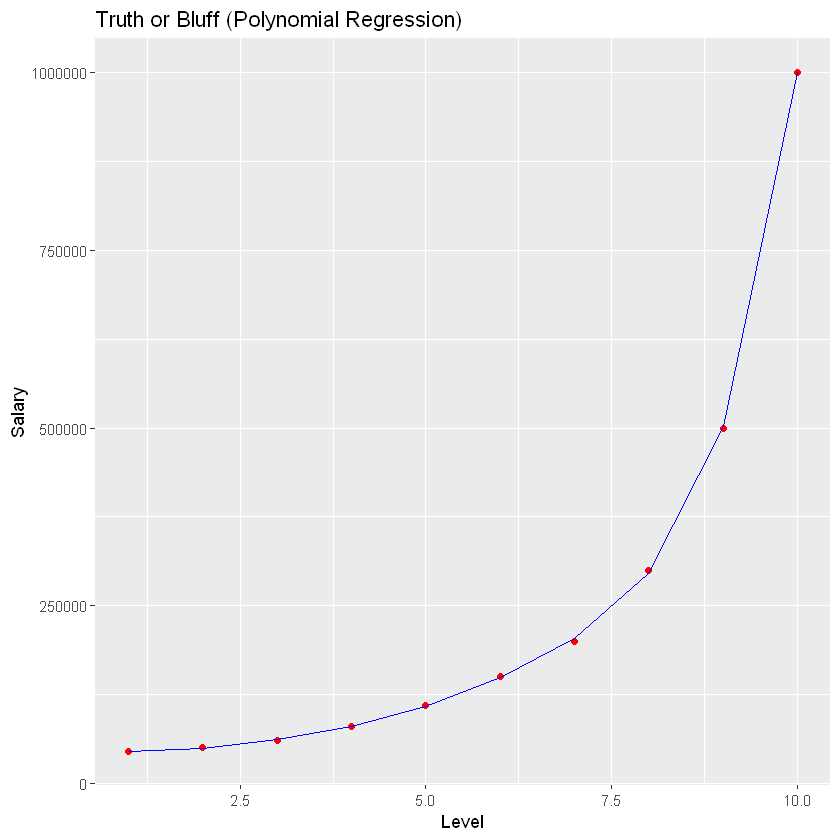

In [8]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

## Visualising the Regression Model results (for higher resolution and smoother curve)

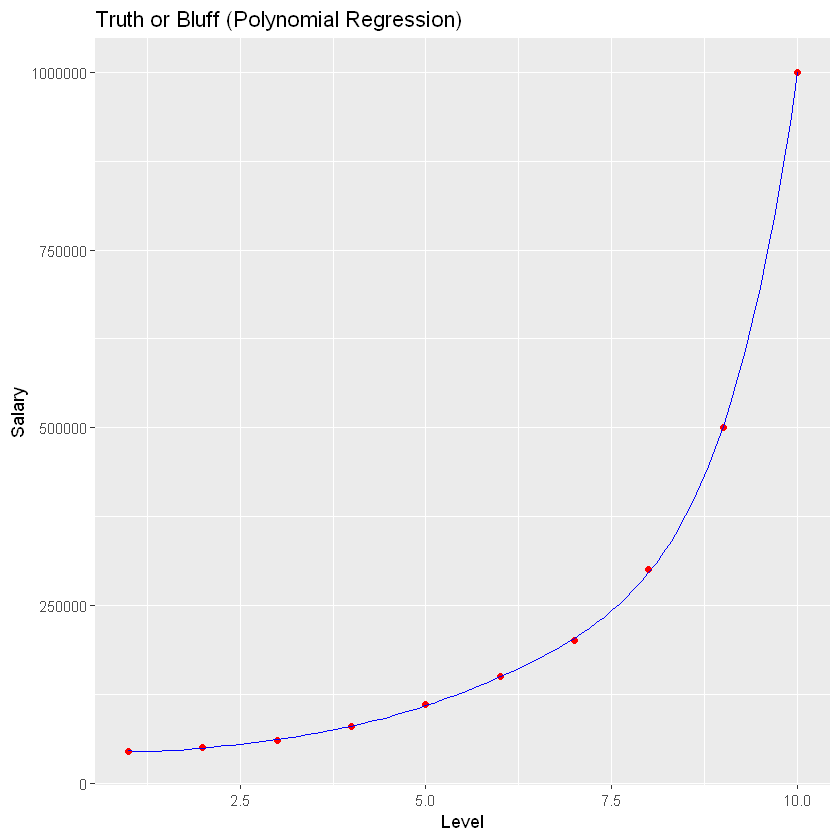

In [9]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(poly_reg,
                                        newdata = data.frame(Level = x_grid,
                                                             Level2 = x_grid^2,
                                                             Level3 = x_grid^3,
                                                             Level4 = x_grid^4,
                                                             Level5 = x_grid^5,
                                                             Level6 = x_grid^6))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

## Predicting a new result with Linear Regression

In [10]:
predict(lin_reg, data.frame(Level = 6.5))

1 
330378.8

## Predicting a new result with Polynomial Regression

In [11]:
predict(poly_reg, data.frame(Level = 6.5,
                             Level2 = 6.5^2,
                             Level3 = 6.5^3,
                             Level4 = 6.5^4,
                             Level5 = 6.5^5,
                             Level6 = 6.5^6))

1 
174192.8